In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

In [3]:
df=pd.read_csv("Tatanic.csv")

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1.0,0.0,3.0,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.2500,NaN,S
1,2.0,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,PC 17599,71.2833,C85,C
2,3.0,1.0,3.0,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.9250,NaN,S
3,4.0,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,C123,S
4,5.0,0.0,3.0,"Allen, Mr. William Henry",male,35.0,0.0,0.0,373450,8.0500,NaN,S


In [6]:
df.isnull().sum()

PassengerId      1
Survived         1
Pclass           1
Name             1
Sex              1
Age             49
SibSp            1
Parch            1
Ticket           1
Fare             1
Cabin          197
Embarked         3
dtype: int64

In [11]:
df.Fare.unique()

array([  7.25  ,  71.2833,   7.925 ,  53.1   ,   8.05  ,   8.4583,
        51.8625,  21.075 ,  11.1333,  30.0708,  16.7   ,  26.55  ,
        31.275 ,   7.8542,  16.    ,  29.125 ,  13.    ,  18.    ,
         7.225 ,  26.    ,   8.0292,  35.5   ,  31.3875, 263.    ,
         7.8792,   7.8958,  27.7208, 146.5208,   7.75  ,  10.5   ,
        82.1708,  52.    ,   7.2292,  11.2417,   9.475 ,  21.    ,
        41.5792,  15.5   ,  21.6792,  17.8   ,  39.6875,   7.8   ,
        76.7292,  61.9792,  27.75  ,  46.9   ,  80.    ,  83.475 ,
        27.9   ,  15.2458,   8.1583,   8.6625,  73.5   ,  14.4542,
        56.4958,   7.65  ,  29.    ,  12.475 ,   9.    ,   9.5   ,
         7.7875,  47.1   ,  15.85  ,  34.375 ,  61.175 ,  20.575 ,
        34.6542,  63.3583,  23.    ,  77.2875,   8.6542,   7.775 ,
        24.15  ,   9.825 ,  14.4583, 247.5208,   7.1417,  22.3583,
         6.975 ,   7.05  ,  14.5   ,  15.0458,  26.2833,   9.2167,
        79.2   ,   6.75  ,  11.5   ,  36.75  ,   7.7958,  12.5

In [21]:
df.groupby('Fare')['Fare'].count().sort_values(ascending=False)

Fare
8.0500     16
13.0000    12
7.8958     10
10.5000     9
7.7500      9
           ..
15.0500     1
15.0458     1
14.4583     1
13.5000     1
20.5750     1
Name: Fare, Length: 123, dtype: int64

In [22]:
df1=df[['Survived','Pclass','Sex','Age','Fare']]

In [23]:
df1

,Survived,Pclass,Sex,Age,Fare
0,0.0,3.0,male,22.0,7.2500
1,1.0,1.0,female,38.0,71.2833
2,1.0,3.0,female,26.0,7.9250
3,1.0,1.0,female,35.0,53.1000
4,0.0,3.0,male,35.0,8.0500
...,...,...,...,...,...
238,0.0,2.0,male,19.0,10.5000
239,0.0,2.0,male,33.0,12.2750
240,0.0,3.0,female,NaN,14.4542
241,1.0,3.0,female,NaN,15.5000


In [32]:
df2=pd.get_dummies(df.Sex)

In [36]:
df3=pd.concat([df1,df2],axis='columns')

In [40]:
df3.drop(['Sex','male'],axis='columns',inplace=True)
df3

,Survived,Pclass,Age,Fare,female
0,0.0,3.0,22.0,7.2500,0
1,1.0,1.0,38.0,71.2833,1
2,1.0,3.0,26.0,7.9250,1
3,1.0,1.0,35.0,53.1000,1
4,0.0,3.0,35.0,8.0500,0
...,...,...,...,...,...
238,0.0,2.0,19.0,10.5000,0
239,0.0,2.0,33.0,12.2750,0
240,0.0,3.0,NaN,14.4542,1
241,1.0,3.0,NaN,15.5000,1


In [49]:
df3.isnull().sum()

Survived    1
Pclass      1
Age         0
Fare        1
female      0
dtype: int64

In [48]:
df3.Age.fillna(df.Age.mean(),inplace=True)

In [52]:
df3.dropna(inplace=True)

In [53]:
df3.isnull().sum()

Survived    0
Pclass      0
Age         0
Fare        0
female      0
dtype: int64

In [54]:
df3.shape

(242, 5)

In [55]:
values=df3.drop('Survived',axis='columns')

In [56]:
targets=df3.Survived

In [57]:
X_train,X_test,y_train,y_test=train_test_split(values,targets,test_size=0.2,random_state=5)

In [58]:
model=GaussianNB()

In [59]:
model.fit(X_train,y_train)

GaussianNB()

In [60]:
model.predict_proba(X_test)

array([[0.16423909, 0.83576091],
       [0.90860113, 0.09139887],
       [0.0952457 , 0.9047543 ],
       [0.86836831, 0.13163169],
       [0.90909358, 0.09090642],
       [0.18132782, 0.81867218],
       [0.14479421, 0.85520579],
       [0.89974385, 0.10025615],
       [0.13819942, 0.86180058],
       [0.7895978 , 0.2104022 ],
       [0.11607043, 0.88392957],
       [0.77079815, 0.22920185],
       [0.85941492, 0.14058508],
       [0.94866925, 0.05133075],
       [0.88923848, 0.11076152],
       [0.90384787, 0.09615213],
       [0.89836821, 0.10163179],
       [0.91310138, 0.08689862],
       [0.89898161, 0.10101839],
       [0.90207888, 0.09792112],
       [0.13054303, 0.86945697],
       [0.87414786, 0.12585214],
       [0.06277642, 0.93722358],
       [0.84567038, 0.15432962],
       [0.08564549, 0.91435451],
       [0.88980053, 0.11019947],
       [0.10638297, 0.89361703],
       [0.88115894, 0.11884106],
       [0.91310138, 0.08689862],
       [0.18050674, 0.81949326],
       [0.

In [70]:
model.score(X_test,y_test)

0.7551020408163265

In [64]:
from sklearn.metrics import confusion_matrix

In [65]:
y_predict=model.predict(X_test)

In [66]:
con=confusion_matrix(y_predict,y_test)

<AxesSubplot:>

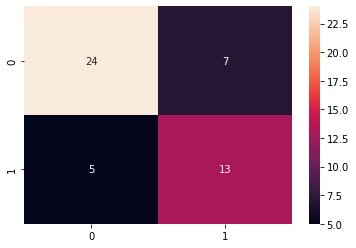

In [69]:
import seaborn as sn
sn.heatmap(con,annot=True)